In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Experiments path
path = "C:\\Users\\luiz_\\Jupyter\\Quantifiers\\experiments"
datas = []

for i in range(len(os.listdir(path))):
    datas.append(pd.read_csv(f"C:\\Users\\luiz_\\Jupyter\\Quantifiers\\experiments\\experiment{i+1}.csv"))
np.array(datas)

array([[[1, 10, 0.0, ..., 0.1, 0.1, 'CC'],
        [1, 10, 0.0, ..., 0.09, 0.09, 'ACC'],
        [1, 10, 0.0, ..., 0.17, 0.17, 'PCC'],
        ...,
        [3, 100, 1.0, ..., 0.0, 0.0, 'HDy'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'DyS'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'SORD']],

       [[1, 10, 0.0, ..., 0.0, 0.0, 'CC'],
        [1, 10, 0.0, ..., 0.0, 0.0, 'ACC'],
        [1, 10, 0.0, ..., 0.02, 0.02, 'PCC'],
        ...,
        [3, 100, 1.0, ..., 0.0, 0.0, 'HDy'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'DyS'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'SORD']],

       [[1, 10, 0.0, ..., 0.0, 0.0, 'CC'],
        [1, 10, 0.0, ..., 0.0, 0.0, 'ACC'],
        [1, 10, 0.0, ..., 0.1, 0.1, 'PCC'],
        ...,
        [3, 100, 1.0, ..., 0.04, 0.04, 'HDy'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'DyS'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'SORD']]], dtype=object)

In [3]:
datas[0]

,sample,Test_size,alpha,actual_prop,pred_prop,abs_error,quantifier
0,1,10,0.0,0.0,0.10,0.10,CC
1,1,10,0.0,0.0,0.09,0.09,ACC
2,1,10,0.0,0.0,0.17,0.17,PCC
3,1,10,0.0,0.0,0.09,0.09,PACC
4,1,10,0.0,0.0,0.08,0.08,X
...,...,...,...,...,...,...,...
3625,3,100,1.0,0.0,0.00,0.00,T50
3626,3,100,1.0,0.0,0.00,0.00,MS
3627,3,100,1.0,0.0,0.00,0.00,HDy
3628,3,100,1.0,0.0,0.00,0.00,DyS


In [4]:
datas[1]

,sample,Test_size,alpha,actual_prop,pred_prop,abs_error,quantifier
0,1,10,0.0,0.0,0.00,0.00,CC
1,1,10,0.0,0.0,0.00,0.00,ACC
2,1,10,0.0,0.0,0.02,0.02,PCC
3,1,10,0.0,0.0,0.00,0.00,PACC
4,1,10,0.0,0.0,0.01,0.01,X
...,...,...,...,...,...,...,...
3625,3,100,1.0,0.0,0.00,0.00,T50
3626,3,100,1.0,0.0,0.00,0.00,MS
3627,3,100,1.0,0.0,0.00,0.00,HDy
3628,3,100,1.0,0.0,0.00,0.00,DyS


In [5]:
datas[2]

,sample,Test_size,alpha,actual_prop,pred_prop,abs_error,quantifier
0,1,10,0.0,0.0,0.00,0.00,CC
1,1,10,0.0,0.0,0.00,0.00,ACC
2,1,10,0.0,0.0,0.10,0.10,PCC
3,1,10,0.0,0.0,0.00,0.00,PACC
4,1,10,0.0,0.0,0.65,0.65,X
...,...,...,...,...,...,...,...
3625,3,100,1.0,0.0,0.03,0.03,T50
3626,3,100,1.0,0.0,0.05,0.05,MS
3627,3,100,1.0,0.0,0.04,0.04,HDy
3628,3,100,1.0,0.0,0.00,0.00,DyS


In [183]:
abs_err = pd.DataFrame(columns=['size', 'alpha', 'abs_error', 'qtf'])
sizes = qtf_data['Test_size'].unique()
alphas = qtf_data['alpha'].unique()[:-1]
quantifiers = datas[2]['quantifier'].unique()
for qtf in quantifiers:   
    qtf_data = datas[2][datas[2]['quantifier'] == qtf]
    for size in sizes:
        for alpha in alphas:
            median_abs_sample = round(qtf_data.loc[(qtf_data['Test_size'] == size) & 
                                             (qtf_data['alpha'] == alpha)]['abs_error'].median(), 2)
            df_ext = {'size':size, 'alpha':alpha, 'abs_error':median_abs_sample, 'qtf':qtf}
            abs_err = pd.concat([abs_err, pd.DataFrame([df_ext.values()], columns=abs_err.columns)], ignore_index=True)

In [184]:
abs_err.head(20)

,size,alpha,abs_error,qtf
0,10,0.0,0.00,CC
1,10,0.1,0.10,CC
2,10,0.2,0.10,CC
3,10,0.3,0.30,CC
4,10,0.4,0.30,CC
5,10,0.5,0.40,CC
6,10,0.6,0.50,CC
7,10,0.7,0.60,CC
8,10,0.8,0.80,CC
9,10,0.9,0.80,CC


In [185]:
size_for_alpha = {}
for size in sizes:
    size_for_alpha[size] = {}
    for qtf in quantifiers:
        size_for_alpha[size][qtf] = abs_err.loc[(abs_err['qtf'] == qtf) & (abs_err['size'] == size)]

In [209]:
size_for_alpha[100]['DyS']

,size,alpha,abs_error,qtf
990,100,0.0,0.0,DyS
991,100,0.1,0.1,DyS
992,100,0.2,0.2,DyS
993,100,0.3,0.3,DyS
994,100,0.4,0.4,DyS
995,100,0.5,0.5,DyS
996,100,0.6,0.6,DyS
997,100,0.7,0.7,DyS
998,100,0.8,0.8,DyS
999,100,0.9,0.9,DyS


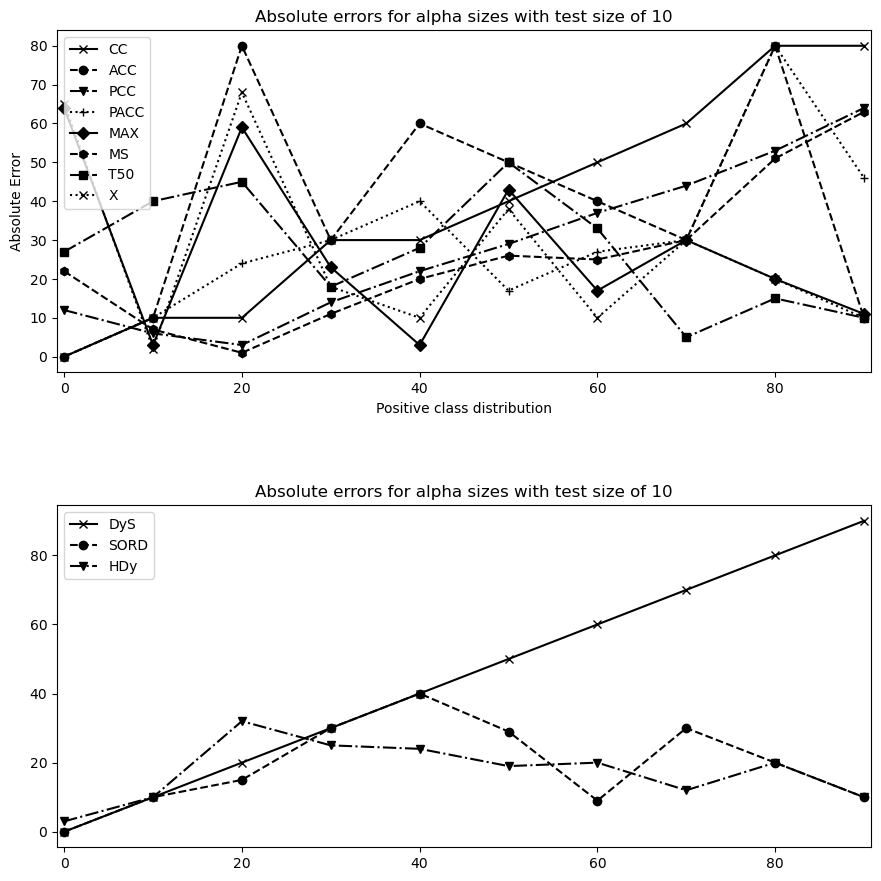

In [205]:
qtfs = ['CC', 'ACC', 'PCC', 'PACC', 'MAX', 'MS', 'T50', 'X']
markers = ['x', 'o', 'v', '+', 'D', 'h', 's', 'x', '+', 'h', 'D']
lines=['-', '--', '-.', ':'] * 3

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(alphas*100, size_for_alpha[10][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(alphas*100, size_for_alpha[10][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for alpha sizes with test size of 10')
ax1.legend()
ax1.set_xlim([-0.8, 90.8])

ax2.set_title('Absolute errors for alpha sizes with test size of 10')
ax2.legend()
ax2.set_xlim([-0.8, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

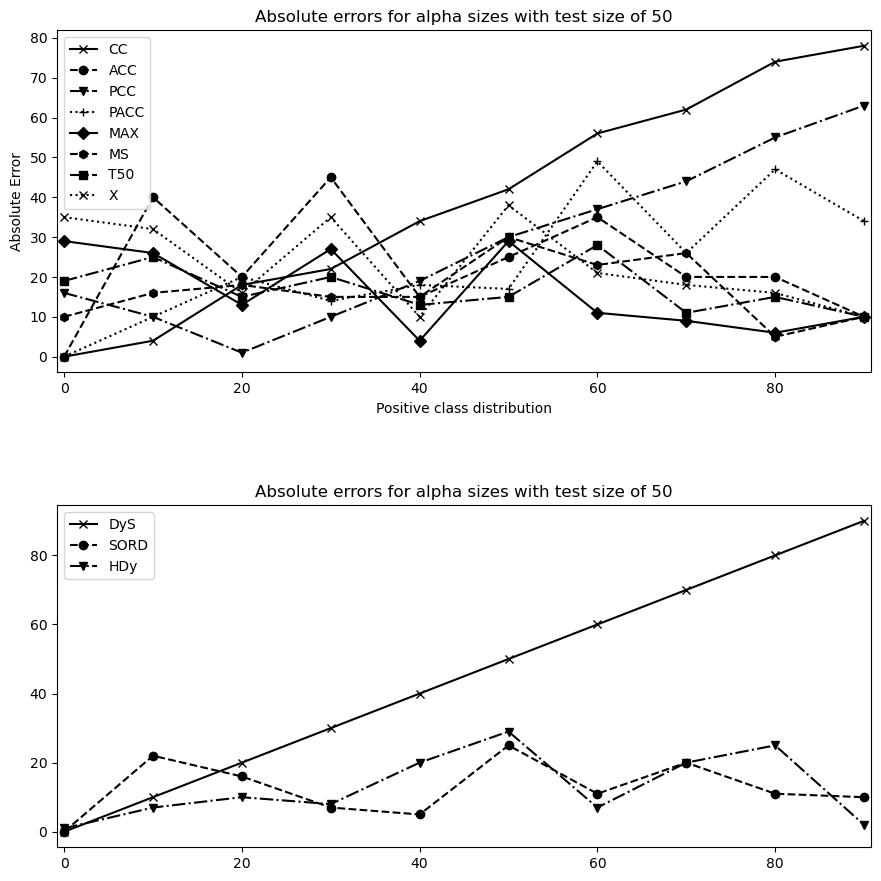

In [207]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(alphas*100, size_for_alpha[50][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(alphas*100, size_for_alpha[50][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for alpha sizes with test size of 50')
ax1.legend()
ax1.set_xlim([-0.8, 90.8])

ax2.set_title('Absolute errors for alpha sizes with test size of 50')
ax2.legend()
ax2.set_xlim([-0.8, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

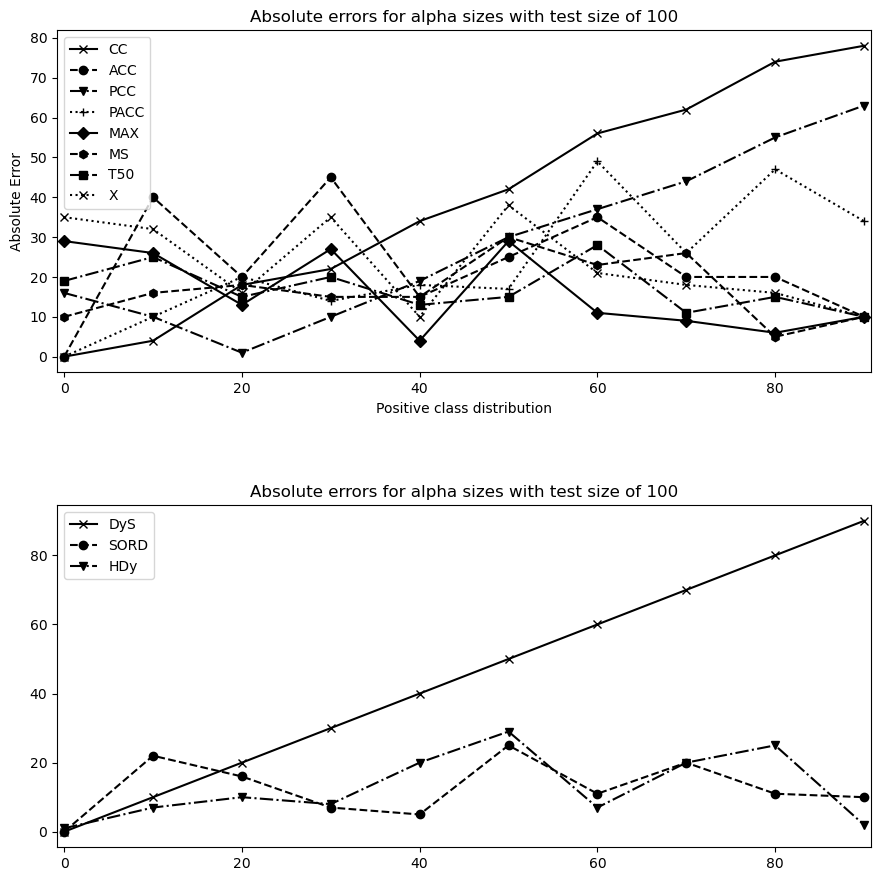

In [208]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(alphas*100, size_for_alpha[50][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(alphas*100, size_for_alpha[50][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for alpha sizes with test size of 100')
ax1.legend()
ax1.set_xlim([-0.8, 90.8])

ax2.set_title('Absolute errors for alpha sizes with test size of 100')
ax2.legend()
ax2.set_xlim([-0.8, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()